# Intro

In this project - I will implement different machine learning models in order to predict the binary classifier of whether an individual earns over $50K in salary using the data provided at :https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

I will use a logistic regression model, followed by a decision tree classifier, followed by a random forest classifier, and finally a xtreme gradient boosted decision tree.

I will then compare the results to determine which model was most useful for this prediction.

## Load Data

My first step will be to load the data and perform exploratory data analysis.

In [1]:
#import initial packages

import numpy as np
import pandas as pd

columns information: 

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
#create list of column names, import data into pandas dataframe, set column names, print first 5 rows

cols = ['age','workclass','fnlweight','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','incomeover50k']
persons = pd.read_csv('adult.data')
persons.columns = cols
persons.head()


,age,workclass,fnlweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,incomeover50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlweight       32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  incomeover50k   32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#check if any missing (Null) data in each column

persons.isnull().any()

age               False
workclass         False
fnlweight         False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
incomeover50k     False
dtype: bool

## Exploratory Data Analysis and Cleaning

In [5]:
#examine the unique values of each column

for col in cols:
    print(col,persons[col].unique())

age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlweight [ 83311 215646 234721 ...  34066  84661 257302]
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machin

Values of the columns age, fnl-weight, education, education-num, marital-status, relationship, race, sex, captial-gain, capital loss, hours-per-week, native-country and 50k all seem to be valid.

workclass seems to contain some missing information denoted by the ' ?' character. 
There seems to be some missing values in occupation denoted by the ' ?' character. 
We will investigate this further. 


In [6]:
# see how many rows contain missing information in the workclass column
len(persons[persons.workclass == ' ?'])

1836

In [7]:
# see how many rows contain missing information in the occupation column
len(persons[persons.occupation == ' ?'])

1843

In [8]:
# see how many rows from the above two are overlapping
len(persons[(persons.workclass == ' ?') & (persons.occupation == ' ?')])

1836

It seems that of the all rows containing missing information for workclass, are also missing information in the occupation column. The occupation column is missing a few more values than workclass. These rows will be dropped as they are only a small fraction of the total dataset. 

In [9]:
# drop rows with missing workclass information
persons.drop(persons[persons.workclass == ' ?'].index, inplace = True)

In [10]:
# confirm all rows were dropped
len(persons[persons.workclass == ' ?'])

0

In [11]:
# drop rows with missing occupation information 
persons.drop(persons[persons.occupation == ' ?'].index, inplace = True)

In [12]:
# confirm all rows were dropped
len(persons[persons.occupation == ' ?'])

0

Now, I will do some exploratory data analysis through visualizing of the interesting data

In [13]:
#import packages
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn-white')

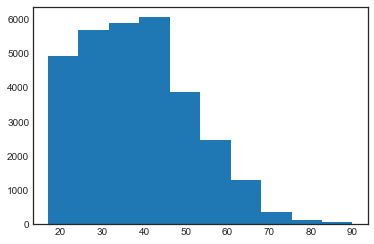

In [14]:
plt.hist(persons['age'])
plt.show()

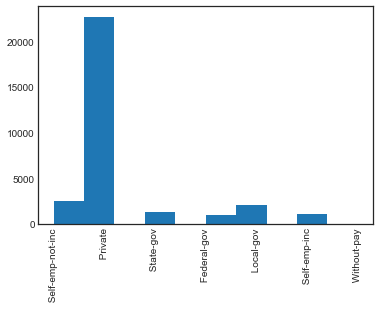

In [15]:
plt.hist(persons['workclass'])
plt.xticks(rotation=90)
plt.show()

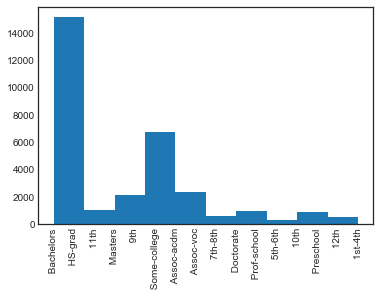

In [16]:
plt.hist(persons['education'])
plt.xticks(rotation=90)
plt.show()

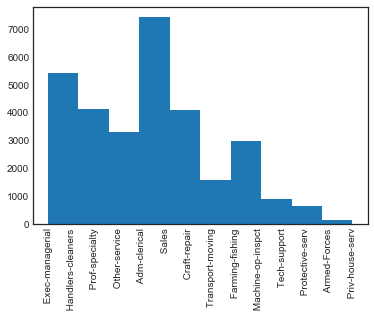

In [17]:
plt.hist(persons['occupation'])
plt.xticks(rotation=90)
plt.show()

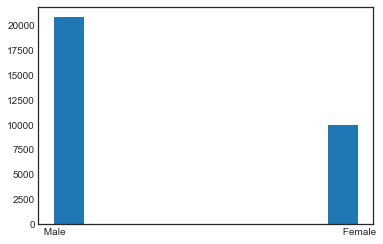

In [18]:
plt.hist(persons['sex'])
plt.show()

## Feature Engineering

Great, now we have a better idea of the distribution of some of the interesting features of our data. In order to effectively train my various machine learning models to predict the category 50k (whether a person makes 50k or above) I will have to convert the 50k column into binary values (1, for above 50k; and 0, for below)

In [19]:
persons['incomeover50k']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: incomeover50k, Length: 30717, dtype: object

In [20]:
persons['incomeover50k'] = persons['incomeover50k'].replace(to_replace=[' >50K', ' <=50K'], value=[1, 0])

print(persons['incomeover50k'])

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: incomeover50k, Length: 30717, dtype: int64


In [21]:
#examine the unique values of each column

for col in cols:
    print(col,persons[col].unique())

age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
fnlweight [ 83311 215646 234721 ...  84661 257302 201490]
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  1  8  2]
marital-status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-supp

Now, our target variable is binary (0 or 1).

We must convert other non-numerical data categories to numerical to work with our model.

In [22]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30717 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30717 non-null  int64 
 1   workclass       30717 non-null  object
 2   fnlweight       30717 non-null  int64 
 3   education       30717 non-null  object
 4   education-num   30717 non-null  int64 
 5   marital-status  30717 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    30717 non-null  object
 8   race            30717 non-null  object
 9   sex             30717 non-null  object
 10  capital-gain    30717 non-null  int64 
 11  capital-loss    30717 non-null  int64 
 12  hours-per-week  30717 non-null  int64 
 13  native-country  30717 non-null  object
 14  incomeover50k   30717 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


We must change the workclass, education, marital-status, occupation, relationship, race, sex and native-country into binary categorical variables using the get_dummies method.

I will start with the workclass column

In [23]:
persons = pd.concat([persons,pd.get_dummies(persons['workclass'])],axis=1)
persons = persons.drop(columns='workclass')
persons.columns


Index(['age', 'fnlweight', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'incomeover50k',
       ' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object')

Now, I will do the same for the other non-numerical data columns

In [24]:
non_nums = ['education','marital-status','occupation','relationship','race','sex','native-country']

for col in non_nums:
    persons = pd.concat([persons,pd.get_dummies(persons[col])],axis=1)
    persons = persons.drop(columns=col)




persons.columns

Index(['age', 'fnlweight', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'incomeover50k', ' Federal-gov', ' Local-gov',
       ' Private',
       ...
       ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
       ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
       ' Yugoslavia'],
      dtype='object', length=106)

In [27]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30717 entries, 0 to 32559
Columns: 106 entries, age to  Yugoslavia
dtypes: int64(7), uint8(99)
memory usage: 4.8 MB


Great, now all of our information is stored in numerical types and we can proceed with fitting our first model.

# Logistic Regression Model

In [28]:
#Split the data into training and testing groups
#I will first use 80% of the data as training data and the remaining as testing data
target = persons['incomeover50k']    
persons = persons.drop(['incomeover50k'],axis=1)
          

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(persons,target,test_size=0.2, random_state=42)



In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = logistic_model.predict(x_test)

## Logistic Regression Model Evaluation

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

target_names = ['below $50k','above $50k']
print(classification_report(y_test,predictions,target_names=target_names))
print('roc auc score:',roc_auc_score(y_test,predictions))

              precision    recall  f1-score   support

  below $50k       0.80      0.96      0.88      4630
  above $50k       0.71      0.27      0.40      1514

    accuracy                           0.79      6144
   macro avg       0.75      0.62      0.64      6144
weighted avg       0.78      0.79      0.76      6144

roc auc score: 0.6185939153929773


Lets now evaluate this model using cross validation

In [41]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=5)
results = model_selection.cross_val_score(logistic_model, x_train, y_train, cv=kfold)

print('The accuaracies from each of the 5 folds using kfold:', results)
print('Variance of kfold accuracies:',results.var())



The accuaracies from each of the 5 folds using kfold: [0.79593082 0.7802645  0.7965412  0.78795279 0.79222629]
Variance of kfold accuracies: 3.6037862824341035e-05


Then lets do some recursive feature elimination!

Then, lets do a decision tree model, followed by a random forest model, then a gradient boosted decision tree, followed by some deep learning!